In [2]:
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import geopandas
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut , GeocoderUnavailable , GeocoderInsufficientPrivileges
from sklearn.linear_model import LinearRegression
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
df = pd.read_csv('Initial_Breakdown_Plan.xlsx - Dataset.csv')

In [4]:
def get_coordinates(cities, country="UK"):
    geolocator = Nominatim(user_agent="geoapiExercises" , timeout=10)
    coordinates = {}

    for city in cities:
        city_query = f"{city}, {country}"
        try:
            location = geolocator.geocode(city_query)
            if location:
                coordinates[city] = (location.latitude, location.longitude)
            else:
                print(f"Could not get the location for {city}")
        except (GeocoderTimedOut, GeocoderInsufficientPrivileges) as e:
            print(f"Error: {e} for {city}")

    return coordinates



In [5]:
df_location = df['Location']
unique_locations = df_location.unique()
unique_locations_coordinates = get_coordinates(unique_locations)

Error: Non-successful status code 403 for London
Error: Non-successful status code 403 for Belfast
Error: Non-successful status code 403 for Reading
Error: Non-successful status code 403 for Birmingham
Error: Non-successful status code 403 for Leeds
Error: Non-successful status code 403 for Bristol
Error: Non-successful status code 403 for Manchester
Error: Non-successful status code 403 for Watford
Error: Non-successful status code 403 for Edinburgh
Error: Non-successful status code 403 for Glasgow
Error: Non-successful status code 403 for Cardiff


C:\Users\Boomw\AppData\Local\Temp\ipykernel_21128\3808974179.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


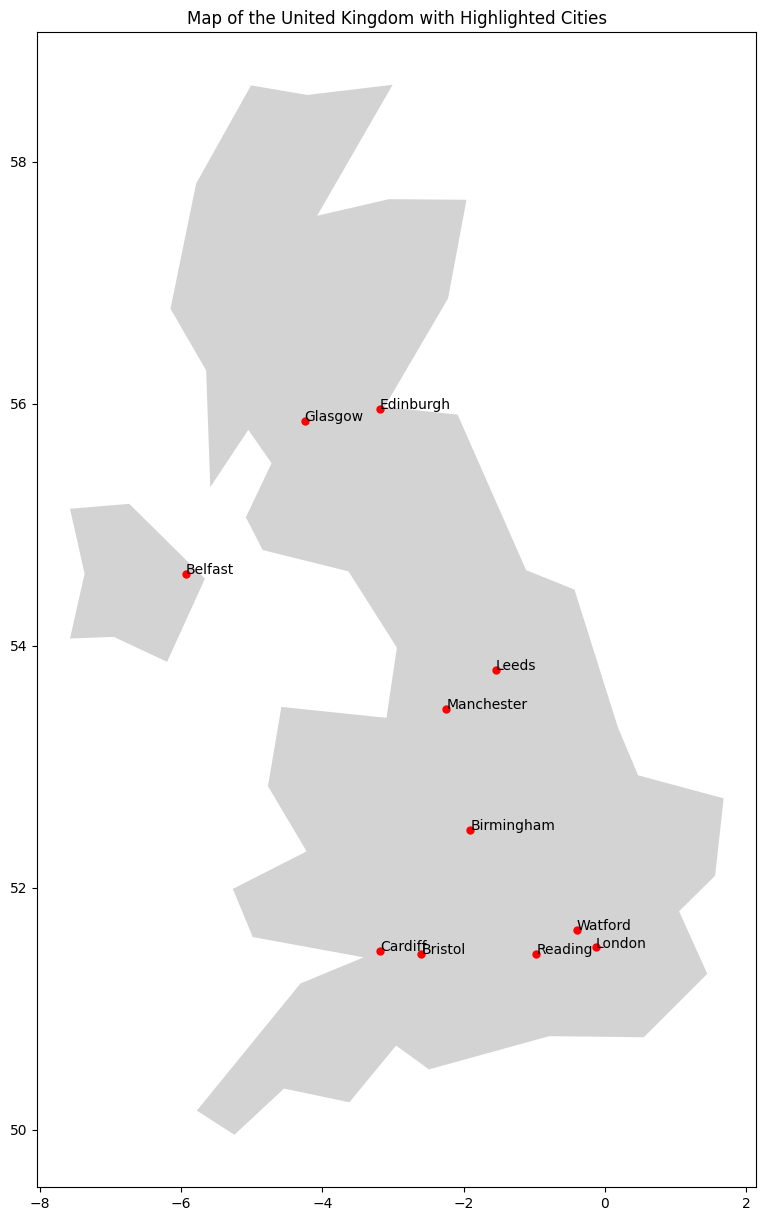

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the built-in Natural Earth dataset from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the dataset to only include the United Kingdom
uk = world[world['name'] == 'United Kingdom']

# Define the cities and their coordinates
cities = {'London': (51.5074456, -0.1277653),
 'Belfast': (54.596391, -5.9301829),
 'Reading': (51.4564242, -0.9700664),
 'Birmingham': (52.4796992, -1.9026911),
 'Leeds': (53.7974185, -1.5437941),
 'Bristol': (51.4538022, -2.5972985),
 'Manchester': (53.4794892, -2.2451148),
 'Watford': (51.6553875, -0.3957425),
 'Edinburgh': (55.9533456, -3.1883749),
 'Glasgow': (55.861155, -4.2501687),
 'Cardiff': (51.4816546, -3.1791934)}

# Create a figure with a specified size
fig, ax = plt.subplots(figsize=(10, 15))  # You can adjust the size as you like

# Plot the map of the United Kingdom
uk.plot(ax=ax, color='lightgray')

# Plot each city
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='o', color='red', markersize=5)
    ax.text(lon, lat, city, fontsize=10)

plt.title('Map of the United Kingdom with Highlighted Cities')
plt.show()


In [7]:
# Getting the amount of items purchased in each area
london = df[df['Location'] == 'London']
belfast = df[df['Location'] == 'Belfast']
reading = df[df['Location'] == 'Reading']
birmingham = df[df['Location'] == 'Birmingham']
leeds = df[df['Location'] == 'Leeds']
bristol = df[df['Location'] == 'Bristol']
manchester = df[df['Location'] == 'Manchester']
watford = df[df['Location'] == 'Watford']
edinburgh = df[df['Location'] == 'Edinburgh']
glasgow  = df[df['Location'] == 'Glasgow']
cardiff  = df[df['Location'] == 'Cardiff']

In [8]:
len_of_city_array = [len(london) , len(belfast) , len(reading),
                         len(birmingham) , len(leeds) , len(bristol),
                         len(manchester) , len(watford) , len(edinburgh),
                         len(glasgow) , len(cardiff)]

cities = ['London', 'Belfast' , 'Reading' , 'Birmingham' , 'Leeds' , 'Bristol' , 'Manchester' , 'Watford' , 'Edinburgh' , 'Glasgow' , 'Cardiff']

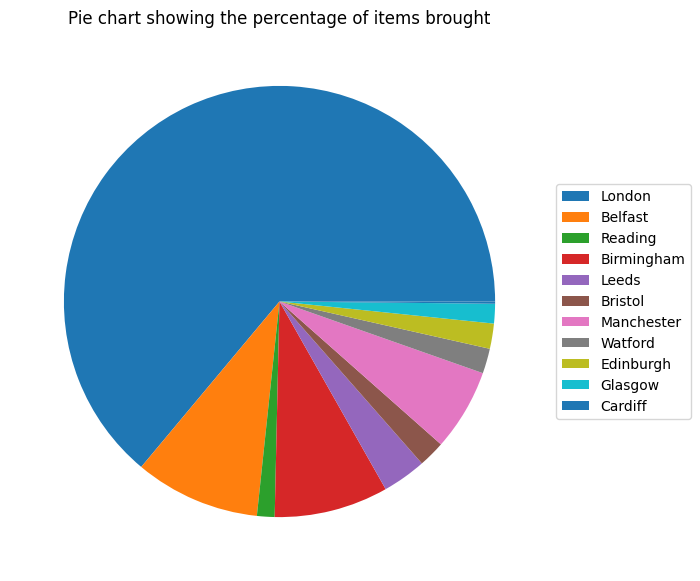

In [9]:
plt.figure(figsize=(14, 7))
plt.pie(len_of_city_array)
plt.legend(cities, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Pie chart showing the percentage of items brought')
plt.show()


In [10]:
london_avg_money_spent = np.mean(london['Cost'])
belfast_avg_money_spent = np.mean(belfast['Cost'])
reading_avg_money_spent = np.mean(reading['Cost'])
birmingham_avg_money_spent = np.mean(birmingham['Cost'])
leeds_avg_money_spent = np.mean(leeds['Cost'])
bristol_avg_money_spent = np.mean(bristol['Cost'])
manchester_avg_money_spent = np.mean(manchester['Cost'])
watford_avg_money_spent = np.mean(watford['Cost'])
edinburgh_avg_money_spent = np.mean(edinburgh['Cost'])
glasgow_avg_money_spent = np.mean(glasgow['Cost'])
cardiff_avg_money_spent = np.mean(cardiff['Cost'])


In [11]:
london_Item_Desc = london['Item Desc']
belfast_Item_Desc = belfast['Item Desc']
reading_Item_Desc = reading['Item Desc']
birmingham_Item_Desc = birmingham['Item Desc']
leeds_Item_Desc = leeds['Item Desc']
bristol_Item_Desc = bristol['Item Desc']
manchester_Item_Desc = manchester['Item Desc']
watford_Item_Desc = watford['Item Desc']
edinburgh_Item_Desc = edinburgh['Item Desc']
glasgow_Item_Desc = glasgow ['Item Desc']
cardiff_Item_Desc = cardiff ['Item Desc']

In [12]:
london_Cost_Center = london['Cost Center Level 5']
belfast_Cost_Center = belfast['Cost Center Level 5']
reading_Cost_Center = reading['Cost Center Level 5']
birmingham_Cost_Center = birmingham['Cost Center Level 5']
leeds_Cost_Center = leeds['Cost Center Level 5']
bristol_Cost_Center = bristol['Cost Center Level 5']
manchester_Cost_Center = manchester['Cost Center Level 5']
watford_Cost_Center = watford['Cost Center Level 5']
edinburgh_Cost_Center = edinburgh['Cost Center Level 5']
glasgow_Cost_Center = glasgow['Cost Center Level 5']  
cardiff_Cost_Center = cardiff['Cost Center Level 5']   


In [13]:
Item_Desc_array = [london_Item_Desc,
belfast_Item_Desc,
reading_Item_Desc,
birmingham_Item_Desc,
leeds_Item_Desc,
bristol_Item_Desc,
manchester_Item_Desc,
watford_Item_Desc,
edinburgh_Item_Desc,
glasgow_Item_Desc,
cardiff_Item_Desc]

In [14]:
cost_center_array = [len(london_Cost_Center),
belfast_Cost_Center,
reading_Cost_Center,
birmingham_Cost_Center,
leeds_Cost_Center,
bristol_Cost_Center,
manchester_Cost_Center,
watford_Cost_Center,
edinburgh_Cost_Center,
glasgow_Cost_Center, 
cardiff_Cost_Center]

In [15]:
avg_money_spent_array = [london_avg_money_spent , belfast_avg_money_spent , reading_avg_money_spent , birmingham_avg_money_spent,
                         leeds_avg_money_spent , bristol_avg_money_spent , manchester_avg_money_spent , watford_avg_money_spent,
                        edinburgh_avg_money_spent , glasgow_avg_money_spent , cardiff_avg_money_spent]

<BarContainer object of 11 artists>

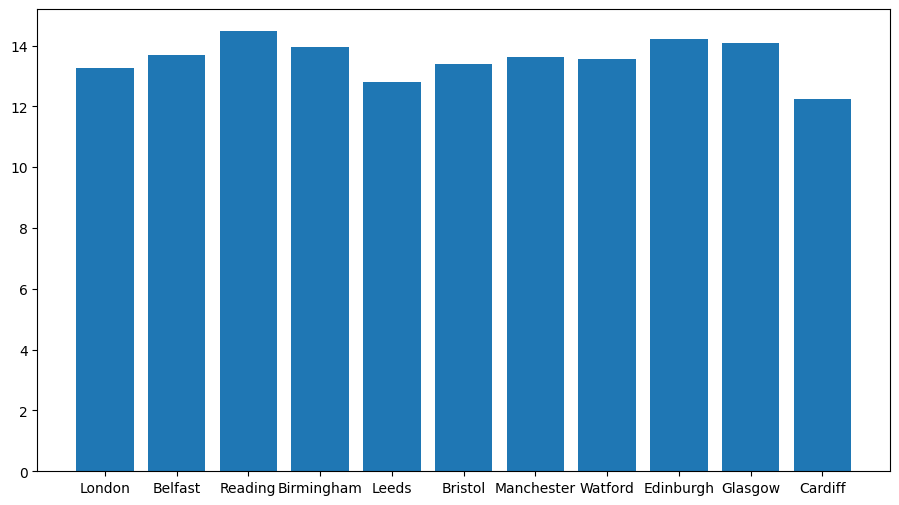

In [16]:
plt.figure(figsize=(11, 6))
plt.bar(cities , avg_money_spent_array)

In [17]:
df_machine = df['Machine']
unique_machine = df_machine.unique()
unique_machine

array(['London Office 1 Vending Machine Level 1 TL',
       'Belfast Vending Machine Level 5',
       'London Office 2 Vending Machine Level 0 R',
       'Reading Vending Machine Level 4',
       'London Office 2 Vending Machine Level 0 L',
       'Birmingham Vending Machine Level 5',
       'Leeds Vending Machine Level 7',
       'London Office 1 Vending Machine Level 1 WT',
       'Bristol Vending Machine Level 5',
       'Manchester Vending Machine Level 6',
       'Watford Vending Machine Level 2',
       'Belfast Vending Machine Level 7',
       'London Office 2 Vending Machine Level 3',
       'Edinburgh Vending Machine Level 4',
       'Glasgow Vending Machine Level 6', 'Cardiff'], dtype=object)

In [18]:
# Arrays to hold the separated values
london_belfast_city = [place for place in unique_machine if place.startswith("London") or place.startswith("Belfast")]
other_city = [place for place in unique_machine if not (place.startswith("London") or place.startswith("Belfast"))]

print("London/Belfast related places:", london_belfast_city)
print("Other places:", other_city)


London/Belfast related places: ['London Office 1 Vending Machine Level 1 TL', 'Belfast Vending Machine Level 5', 'London Office 2 Vending Machine Level 0 R', 'London Office 2 Vending Machine Level 0 L', 'London Office 1 Vending Machine Level 1 WT', 'Belfast Vending Machine Level 7', 'London Office 2 Vending Machine Level 3']
Other places: ['Reading Vending Machine Level 4', 'Birmingham Vending Machine Level 5', 'Leeds Vending Machine Level 7', 'Bristol Vending Machine Level 5', 'Manchester Vending Machine Level 6', 'Watford Vending Machine Level 2', 'Edinburgh Vending Machine Level 4', 'Glasgow Vending Machine Level 6', 'Cardiff']


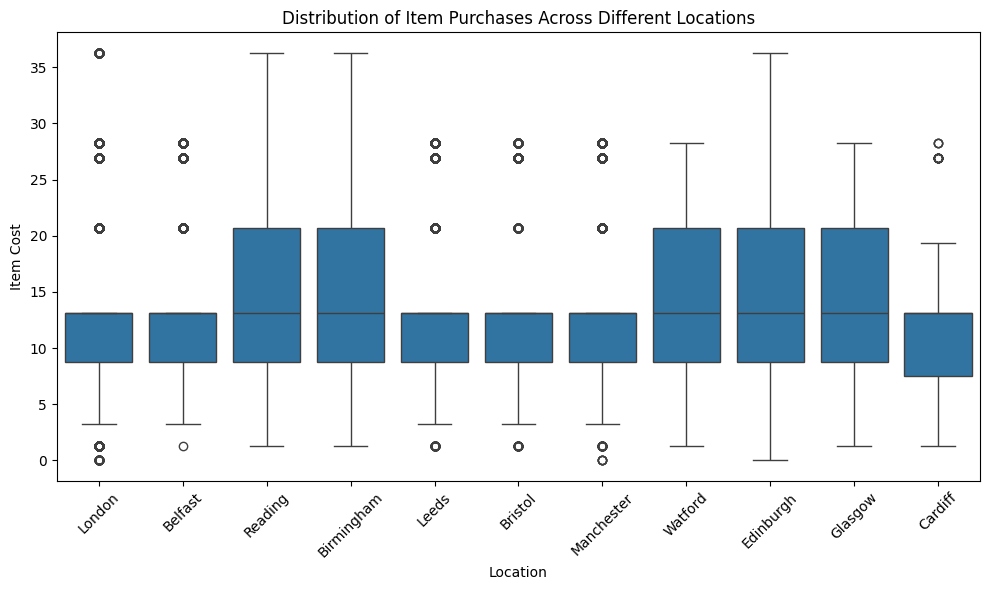

In [19]:
#This needs to be changed to a normal distribution graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df should have columns: 'Location' and 'Cost' or any other column representing the quantity of items bought

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Location', y='Cost')
plt.xlabel('Location')
plt.ylabel('Item Cost')
plt.title('Distribution of Item Purchases Across Different Locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

In [20]:
#Get all the cities then use an aggregrate of all the cities 
london_grouped = london.groupby('Item Desc').size()
london_grouped

Item Desc
DVI/VGA Adapter (USB)                          101
Generic Manufacturer USB-C to USB-C cable       33
HDMI to HDMI Cable (1m)                        957
HDMI to VGA Cable                              310
Headphones (Wired, In-ear)                    6495
Headphones (Wired, In-ear) G2                 1135
Headset (Wired)                               2663
Laptop Power Adapter (65W USB-C)              5693
Mouse (Wired)                                 1540
Mouse (Wireless)                              4773
Network Adapter (Yoga G2/G3)                    56
USB-C to USB-C Cable (1.8m)                   1075
iPhone 13 Case                                 801
iPhone 13 Screen Protector                    1141
iPhone 7+/8+ Case                              181
iPhone 7+/8+ Screen Protector                  246
iPhone 7/8/SE Case                             360
iPhone 7/8/SE Screen Protector                 755
iPhone Lightning Cable                       10360
iPhone Lightning Cabl

In [21]:
new_df = df[['Location', 'Item Desc', 'Cost Center Level 5' , 'Management Level' , 'Machine', 'Day' , 'RecordID']]

In [22]:
X = new_df.drop('RecordID', axis=1)  # Features
y = new_df['RecordID']  # Target variable

X = pd.get_dummies(X, columns=['Location', 'Item Desc', 'Cost Center Level 5' , 'Management Level' , 'Machine'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1967298.2398526096
R-squared: 0.9968156587512234


In [23]:
# Let's assume 'df' is your DataFrame
# Features - all columns except the target variable 'ItemCount'
X = df.drop(['ItemCount'], axis=1)

# Target Variable - 'ItemCount'
y = df['ItemCount']

# If there are categorical variables, convert them to dummy variables
X = pd.get_dummies(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the item counts for the test set
y_pred = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


,Day,Location_Belfast,Location_Birmingham,Location_Bristol,Location_Cardiff,Location_Edinburgh,Location_Glasgow,Location_Leeds,Location_London,Location_Manchester,...,Machine_Glasgow Vending Machine Level 6,Machine_Leeds Vending Machine Level 7,Machine_London Office 1 Vending Machine Level 1 TL,Machine_London Office 1 Vending Machine Level 1 WT,Machine_London Office 2 Vending Machine Level 0 L,Machine_London Office 2 Vending Machine Level 0 R,Machine_London Office 2 Vending Machine Level 3,Machine_Manchester Vending Machine Level 6,Machine_Reading Vending Machine Level 4,Machine_Watford Vending Machine Level 2
6084,33,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9120,47,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
70137,308,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3393,19,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83455,355,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61872,277,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23996,117,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
74437,323,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
77293,334,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
